# Data

In [124]:
!pip install wordcloud

In [125]:
# import 
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud


from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [126]:
df1 = pd.read_json('Sarcasm_Headlines_Dataset.json', lines = True)
df2 = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [127]:
df1

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [128]:
df2

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [129]:
df = pd.concat([df1, df2], axis=0)

In [130]:
df.shape

(55328, 3)

# Data Cleaning

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55328 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  55328 non-null  object
 1   headline      55328 non-null  object
 2   is_sarcastic  55328 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [132]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [133]:
df.drop('article_link', axis=1, inplace=True)

In [134]:
df.columns = ['text', 'labels']

In [135]:
df.duplicated().sum()

26825

In [136]:
df.drop_duplicates(keep='first', inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28503 entries, 0 to 28589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    28503 non-null  object
 1   labels  28503 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 668.0+ KB


In [138]:
df['labels'].value_counts()

0    14951
1    13552
Name: labels, dtype: int64

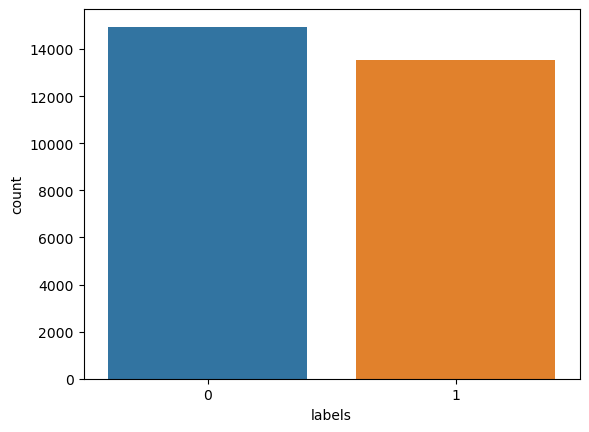

In [139]:
sns.countplot(x= df['labels'])
plt.show()

In [140]:
df

,text,labels
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
28497,tyson holds contest to let fans submit new ide...,1
28509,increasingly cocky bernie sanders announces he...,1
28520,cash-strapped zuckerberg forced to sell 11 mil...,1
28544,grocery store bar actually has great little ha...,1


# Text Processing

In [141]:
# Download necessary NLTK corpora

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE) # remove punctuation
    text = text.lower() # convert to lowercase
    
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")] # lemmatization (hampir sama kek steming)
    text = [word for word in text if not word in stop_words] # remove stopwords
    text = " ".join(text)
    return text

# Apply the text cleaning function to our data
df['Processed_Text'] = df.text.apply(lambda x: clean_text(x))
df

,text,labels,Processed_Text
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sue secret black co...
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catch thorny political mood b...
2,mom starting to fear son's web series closest ...,1,mom starting fear son web series closest thing...
3,"boehner just wants wife to listen, not come up...",1,boehner want wife listen come alternative debt...
4,j.k. rowling wishes snape happy birthday in th...,0,jk rowling wish snape happy birthday magical way
...,...,...,...
28497,tyson holds contest to let fans submit new ide...,1,tyson hold contest let fan submit new idea tor...
28509,increasingly cocky bernie sanders announces he...,1,increasingly cocky bernie sander announces won...
28520,cash-strapped zuckerberg forced to sell 11 mil...,1,cashstrapped zuckerberg forced sell 11 million...
28544,grocery store bar actually has great little ha...,1,grocery store bar actually ha great little hap...


In [142]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['token'] = df['Processed_Text'].apply(word_tokenize_wrapper)
df

,text,labels,Processed_Text,token
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sue secret black co...,"[former, versace, store, clerk, sue, secret, b..."
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catch thorny political mood b...,"[roseanne, revival, catch, thorny, political, ..."
2,mom starting to fear son's web series closest ...,1,mom starting fear son web series closest thing...,"[mom, starting, fear, son, web, series, closes..."
3,"boehner just wants wife to listen, not come up...",1,boehner want wife listen come alternative debt...,"[boehner, want, wife, listen, come, alternativ..."
4,j.k. rowling wishes snape happy birthday in th...,0,jk rowling wish snape happy birthday magical way,"[jk, rowling, wish, snape, happy, birthday, ma..."
...,...,...,...,...
28497,tyson holds contest to let fans submit new ide...,1,tyson hold contest let fan submit new idea tor...,"[tyson, hold, contest, let, fan, submit, new, ..."
28509,increasingly cocky bernie sanders announces he...,1,increasingly cocky bernie sander announces won...,"[increasingly, cocky, bernie, sander, announce..."
28520,cash-strapped zuckerberg forced to sell 11 mil...,1,cashstrapped zuckerberg forced sell 11 million...,"[cashstrapped, zuckerberg, forced, sell, 11, m..."
28544,grocery store bar actually has great little ha...,1,grocery store bar actually ha great little hap...,"[grocery, store, bar, actually, ha, great, lit..."


# Model Building

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Bernoulli

In [147]:
X = np.array(df['text'])
y = np.array(df['labels'])

In [148]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [150]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [151]:
y_pred = bnb.predict(X_test)

In [152]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      2991
           1       0.86      0.81      0.83      2710

    accuracy                           0.84      5701
   macro avg       0.85      0.84      0.84      5701
weighted avg       0.85      0.84      0.84      5701



## Logistic Regression

In [163]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=500)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[2557  434]
 [ 442 2268]]
accuracy_Logistic Regression : 0.846
precision_Logistic Regression : 0.846
recall_Logistic Regression: 0.846
f1-score_Logistic Regression : 0.846


## SVM

In [164]:
linear_svc = LinearSVC(max_iter=3000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Support Vector Machine\n',cm)
print('accuracy_Support Vector Machine: %.3f' %accuracy)
print('precision_Support Vector Machine: %.3f' %precision)
print('recall_Support Vector Machine: %.3f' %recall)
print('f1-score_Support Vector Machine : %.3f' %f1)

Confusion matrix for Support Vector Machine
 [[2528  463]
 [ 522 2188]]
accuracy_Support Vector Machine: 0.827
precision_Support Vector Machine: 0.827
recall_Support Vector Machine: 0.827
f1-score_Support Vector Machine : 0.827


In [168]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[2253  738]
 [ 665 2045]]
accuracy_DecisionTree: 0.754
precision_DecisionTree: 0.754
recall_DecisionTree: 0.754
f1-score_DecisionTree : 0.754


In [169]:
decision_tree = DecisionTreeClassifier(criterion="entropy",max_depth=1000)
decision_tree= decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[2238  753]
 [ 631 2079]]
accuracy_DecisionTree: 0.757
precision_DecisionTree: 0.757
recall_DecisionTree: 0.757
f1-score_DecisionTree : 0.757
